In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [122]:
sed=pd.read_csv('messages.csv',encoding='latin1')
sed

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [123]:
sed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [124]:
print("shape = >",sed.shape)

shape = > (2893, 3)


In [125]:
print("non spam and spam counts","\n",sed.label.value_counts())

non spam and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [126]:
print("spam ratio =","\n",round(len(sed[sed["label"]==1])/len(sed["label"]),2)*100,"%")
print("non spam ratio =","\n",round(len(sed[sed["label"]==0])/len(sed["label"]),2)*100,"%")

spam ratio = 
 17.0 %
non spam ratio = 
 83.0 %


In [127]:
sed['length'] = sed.message.str.len()
sed.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [128]:
sed['message']=sed['message'].str.lower()

In [129]:
sed['message'] = sed['message'].str.replace('^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
sed['message'] = sed['message'].str.replace('^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
sed['message'] = sed['message'].str.replace('^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
sed['message'] = sed['message'].str.replace('\d+(\.\d+)?','numbr')
sed['message'] = sed['message'].str.replace('£|\$','dollers')

In [130]:
sed['message'] = sed['message'].str.replace('[^\w\d\s]',' ')
sed['message'] = sed['message'].str.replace('\s+',' ')
sed['message'] = sed['message'].str.replace('^\s+|\s+?$','')
sed['message'] = sed['message'].str.replace('\_',' ')

In [131]:
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

sed['message'] = sed['message'].apply(lambda x: ' '.join(term for term in x.split()if term not in stop_words))

In [132]:
sed['clean_length'] = sed.message.str.len()
sed.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2047
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1454
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [133]:
print('Original Length', sed.length.sum())
print('Clean Lenght', sed.clean_length.sum())

Original Length 9344743
Clean Lenght 6605523


In [85]:
# sed.to_csv('file1.csv') 

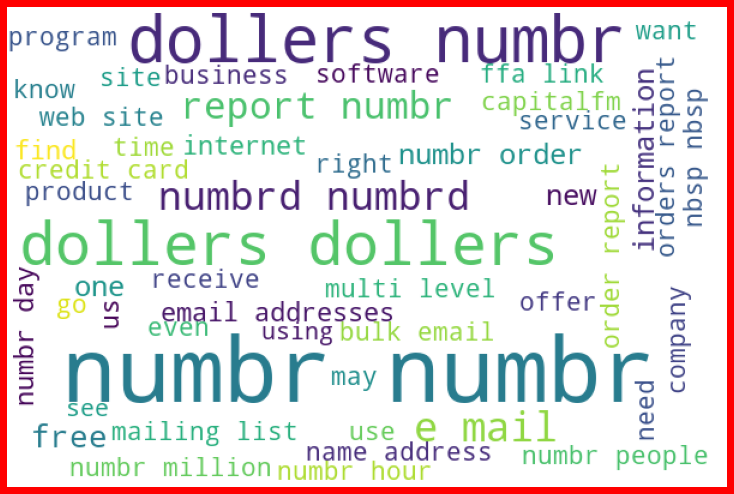

In [117]:
spams = sed['message'][sed['label']==1]

spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

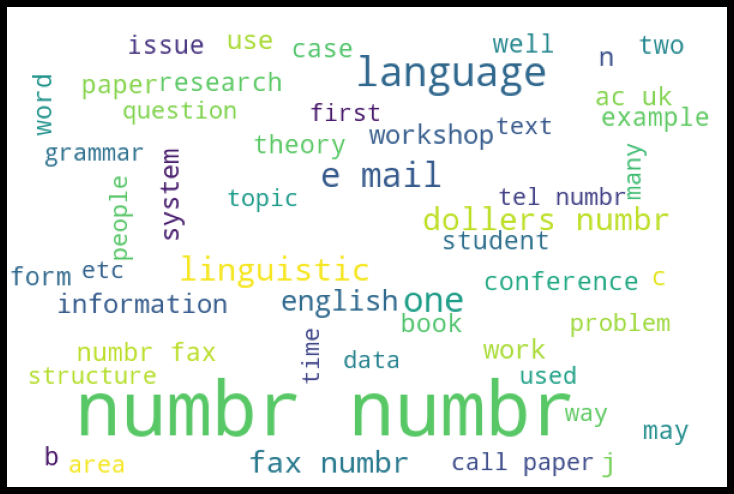

In [118]:
nspams = sed['message'][sed['label']==0]

spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(nspams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [134]:
tf_vec = TfidfVectorizer()

# naive = MultinomialNB()

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

features = tf_vec.fit_transform(sed['message'])
X = features
y = sed['label']

In [135]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42) #test_size=0.20 random_state=42 test_size=0.15

# naive.fit(X_train,Y_train)
# y_pred = naive.predict(x_test)

SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)

print('Final score = > ',accuracy_score(y_test,y_pred))

Final score = >  0.9875690607734806


In [136]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       585
           1       0.99      0.94      0.97       139

    accuracy                           0.99       724
   macro avg       0.99      0.97      0.98       724
weighted avg       0.99      0.99      0.99       724



In [138]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[584,   1],
       [  8, 131]], dtype=int64)

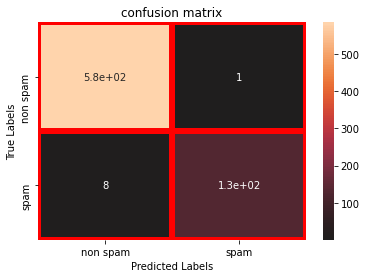

In [139]:
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('confusion matrix')
ax.xaxis.set_ticklabels(['non spam','spam'])
ax.yaxis.set_ticklabels(['non spam','spam'])
plt.show()

In naive_bayes the accuracy score was in between 83 to 88 %
& in SVM the accuracy score is around 98%

In [ ]:
#We see SVM to perform the best.
#save the best model.
import pickle
filename='Email_spam_detect.pkl'
M=open(filename,'wb')
pickle.dump(SVM,M)
M.close()